In [2]:
import numpy as np
#!pip install cupy
#import cupy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm


In [3]:
def zeroth_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a = (1/z1) * ((1 - alpha) * L + alpha * R)
    c20a = (-z1/z2) * c10a
    c10b = (1/z1) * ((1 - beta) * L + beta * R)
    c20b = (-z1/z2) * c10b
    phi0a = V * (np.log(((1 - alpha) * L + alpha * R)) - np.log(R)) / (np.log(L) - np.log(R))
    phi0b = V * (np.log(((1 - beta)  * L + beta * R)) - np.log(R)) / (np.log(L) - np.log(R))
    y0 = ((1.0 / ((z1 - z2) * (L - R))) * np.log(((1 - alpha) * L + alpha * R) / ((1 - beta) * L + beta * R)))
    J10 = ((L - R) / (z1 * (np.log(L) - np.log(R)))) * (z1 * V + np.log(L) - np.log(R))
    J20 = ((R - L) / (z2 * (np.log(L) - np.log(R)))) * (z2 * V + np.log(L) - np.log(R))
    return c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20

In [4]:
def first_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a = (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21a = (z1 * alpha * (phi0b - phi0a) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c11b = (z2 * (1 - beta) * (phi0a - phi0b) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21b = (z1 * (1 - beta) * (phi0a - phi0b) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c1L  = L / z1
    c1R  = R / z1
    T0   =   J10 +  J20

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
    B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

    lambda_val = V / (np.log(L) - np.log(R))
    phi1a = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1L) - np.log(c10a))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10a)) + (lambda_val * ((z2 * alpha * (phi0b - phi0a)) / ((z1 - z2) * c10a) ) )
    phi1b = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1R) - np.log(c10b))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10b)) + (lambda_val * ((z2 * (1 - beta) * (phi0a - phi0b)) / ((z1 - z2) * c10b) ) )
    y1 = (((1 - beta) * c1L + alpha * c1R) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * c10a * c10b) \
           + ((np.log(c10a) - np.log(c10b)) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * (c1L - c1R)) \
            - (((z2 * J10 + z1 * J20) * (c10a - c10b)) / (z1 ** 2 * z2 * (z1 - z2) * T0 ** 2 * c10a * c10b))
    J11 = ( (A * (z2 * (1 - B) * V + np.log(L) - np.log(R))) / ((z1 - z2) * (np.log(L) - np.log(R))**2) ) * (z1 * V + np.log(L) - np.log(R))
    J21 = ( (A * (z1 * (1 - B) * V + np.log(L) - np.log(R))) / ((z2 - z1) * (np.log(L) - np.log(R))**2) ) * (z2 * V + np.log(L) - np.log(R))


    return c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21

In [5]:
 # Define the second order terms
def second_order_terms(V, alpha, beta, L, R, z1, z2):
    # Constants
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V, alpha, beta, L, R, z1, z2)
    H1 = 1.0
    phiL = V
    phiR = 0.0
    c1L  = L / z1
    c1R  = R / z1
    T0   = J10 +  J20
    T1   = J11 +  J21
    I1   = z1*J11 + z2*J21

    # Intermediate calculations
    A1 = -z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
    B1 = z1 * (c10b - c1R) / ((1 - beta) * H1 * (np.log(c10b) - np.log(c1R)))

    A2_1 = (z1 * z2 * (phi1a - phi1b) / ((z1 - z2) * H1)) * (
    (1 / z1) + (V - phi0a) / (np.log(c1L) - np.log(c10a)) - (V - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a) )

    A2_2 = (z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a))) ) * (
    z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

    A2_3 = (z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a)) * (z1 - z2)**2) ) * (
    (z1 - z2) * phi1a - ((z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a)) - 1 / (2 * z1 * c10a)
    + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * c10a**2)
    + z2 * (c11a + c21a) * (V - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * c10a**2) )

    A2 = A2_1 - A2_2 - A2_3

    # B2:
    B2_1 = (z1 * z2 * (phi1a - phi1b) / ((z1 - z2) * H1)) * (
    (1 / z1) + phi0b / (np.log(c10b) - np.log(c1R)) - phi0b * (c10b - c1R) / ((np.log(c10b) - np.log(c1R))**2 * c10b))

    B2_2 = (z1 * (c10b - c1R) / ((1 - beta) * H1 * (np.log(c10b) - np.log(c1R)))) * (
    z1 * z2 * (1 - beta) * (phi0a - phi0b) / (2 * (z1 * (z1 - z2) * c10b)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10b)**2))

    B2_3 = (z1 * z2 * (phi0b - phi0a) / (H1 * (np.log(c10b) - np.log(c1R)) * (z1 - z2)**2)) * (
    (z1 - z2) * phi1b - (z1 - z2) * (c10b - c1R) * phi1b / ((np.log(c10b) - np.log(c1R)) * c10b) - (1 / (2 * z1 * c10b))
    + (c10b - c1R) / (2 * z1 * (np.log(c10b) - np.log(c1R)) * c10b**2)
    + z2 * (c11b + c21b) * phi0b * (c1R + c10b) / (2 * (np.log(c10b) - np.log(c1R)) * c10b**2))


    B2 = B2_1 + B2_2 - B2_3

    # C:
    C_1 = -(z1**2 * c11a + z2**2 * c21a) / (2 * (z1 * (z1 - z2) * c10a)**2)
    C_2 = (z1**2 * c11b + z2**2 * c21b) / (2 * (z1 * (z1 - z2) * c10b)**2)
    C_3 = (z1 + z2) * ((c10b)**2 - (c10a)**2) / (12 * (z1 * (z1 - z2) * c10a * c10b)**2)
    C_4 = -I1 * y1

    C_5 = ((z1 - z2) * (L - R) * V * y1) / (H1 * (np.log(L) - np.log(R)) * c10a) * (
    (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (c10a * (phi0a - phi0b) / (H1 * T0)) - 1 / (z1 - z2))

    C_6 = z2 * V * (1 / (c10a)**2 - 1 / (c10b)**2)/ (2 * z1 * (z1 - z2)**2 * (np.log(L) - np.log(R)))

    C_7 = z1 * z2 * (phi1a - phi1b) * V * ((1 / (z1 * (z1 - z2))) * (alpha / c10a + (1 - beta) / c10b) + y0 / H1)/ (np.log(L) - np.log(R))

    C_8 = -((z1**2 * z2**2 * V) / (2 * (np.log(L) - np.log(R)) ) ) * (T0 * y1 + T1 * y0)**2

    C_9 = (z1 * z2 * V * (phi0a - phi0b) * y0 / (H1 * c10a * (np.log(L) - np.log(R))) ) * (
        z2 * alpha * (phi0b - phi0a) / (z1 - z2) - (1 / (z1 - z2)) )

    C_10 = (J11 * V / (z1 * T0 * (np.log(L) - np.log(R))) ) * (1 / c10b - 1 / c10a)

    C_11 = (J10 * (phi0a - phi0b) * V) * (1 / c10b - 1 / c10a) / (z1 * T0**2 * H1 * (np.log(L) - np.log(R)))

    C = C_1 + C_2 + C_3 + C_4 + C_5 + C_6 + C_7 + C_8 + C_9 + C_10 + C_11


    # Calculate c12a, c22a, c12b, c22b
    c12a = -(z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10a) - ((phi1a - phi1b) * alpha * z2) / (z1 - z2)
    c22a = (4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10a) + ((phi1a - phi1b) * alpha * z1) / (z1 - z2)
    c12b = -(z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10b) + ((phi1a - phi1b) * (1 - beta) * z2) / (z1 - z2)
    c22b = (4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10b) - ((phi1a - phi1b) * (1 - beta) * z1) / (z1 - z2)

    # Calculate phi2a, phi2b
    phi2a = (B1 * C - (z1 - z2) * y0 * B1 * A2 - z2 * y0 * B1 * (phi1b - phi1a) / H1 +
              B2 - A2) / (A1 - B1 + (z1 - z2) * y0 * A1 * B1)
    phi2b = (1 - (z1 - z2) * y0 * A1) * phi2a + C - (z1 - z2) * y0 * A2 - z2 * y0 * (phi1b - phi1a) / H1

    # Calculate y2
    y2_1 = ((phi1a - phi1b) * y0 / (H1 * T0)) - y1 / c10a * (
    (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - c10a * (phi0a - phi0b) / (H1 * T0) - (1 / (z1 - z2)) )

    y2_2 = (1 / (2 * z1**2 * (z1 - z2)**2 * T0)) * (1 / (c10a)**2 - 1 / (c10b)**2)

    y2_3 = ((phi1a - phi1b) / (z1 * (z1 - z2) * T0)) * (alpha / c10a + (1 - beta) / c10b)

    y2_4 = (-z1 * z2 / (2 * T0)) * (T0 * y1 + T1 * y0)**2

    y2_5 = (phi0a - phi0b) * y0 / (H1 * T0 * c10a) * (
        z2 * alpha * (phi0b - phi0a) / (z1 - z2) - 1 / (z1 - z2) )

    y2_6 = J11 / (z1**2 * z2 * T0**2) * (1 / c10b - 1 / c10a)

    y2_7 = J10 * (phi0a - phi0b) / (z1**2 * z2 * T0**3 * H1) * (1 / c10b - 1 / c10a)

    y2 = y2_1 + y2_2 + y2_3 + y2_4 + y2_5 + y2_6 + y2_7





    # Calculate J12 and J22:
    Jcommon_1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z1 - z2)))
    Jcommon_2 = z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
    Jcommon_3 = (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))
    Jcommon_4 = z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a)) * (z1 - z2)**2)
    Jcommon_5 = (z1 - z2) * phi1a - ( (z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a) ) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * (c10a**2)) + z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * (c10a**2))
    
    J_term2 = Jcommon_2 * Jcommon_3
    J_term3 = Jcommon_4 * Jcommon_5
    
    #
    J_term11 = (1 / z1) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a)
    J_term12 = (1 / z2) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a)
    
    
    J12_term1 = Jcommon_1 * J_term11

    J12 = J12_term1 - J_term2 - J_term3

    # Calculate J22:
    J22_term1 = - Jcommon_1 * J_term12

    J22 = J22_term1 + J_term2 + J_term3 


    return c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22


#result = second_order_terms(V, alpha, beta, L, R, z1, z2)
#print(result)


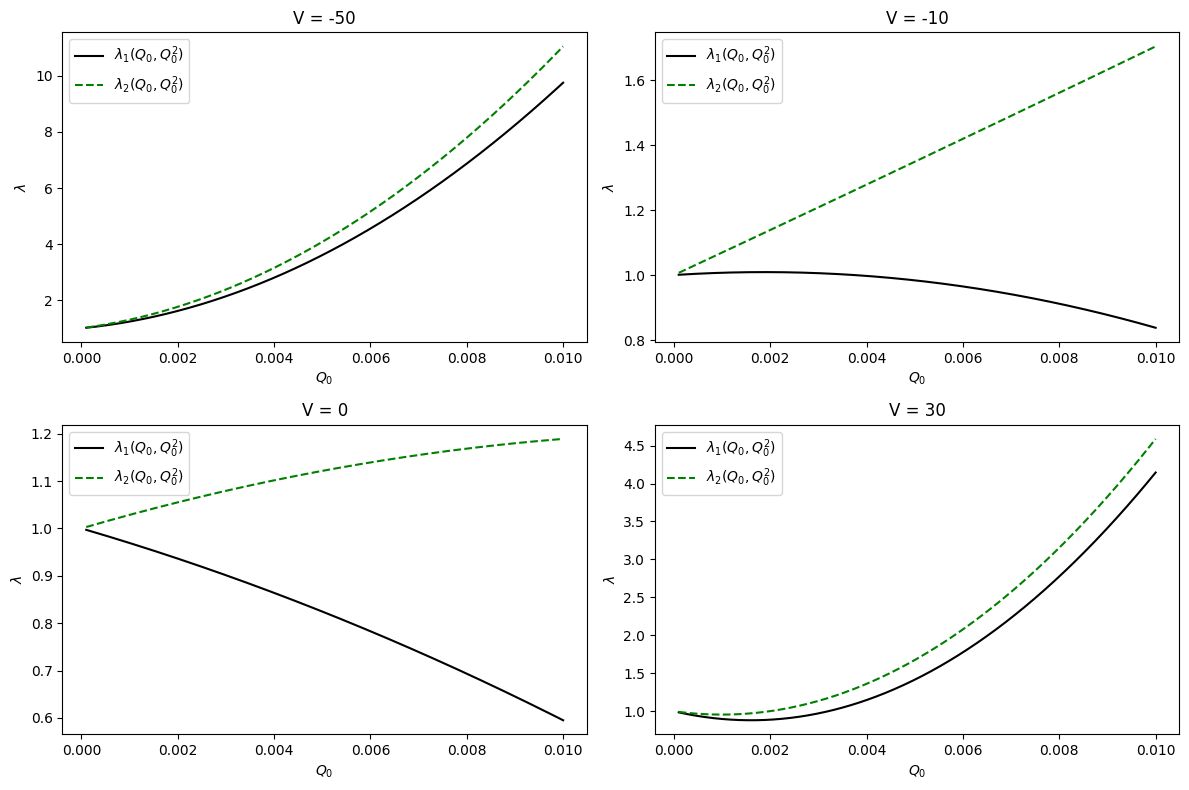

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ranges for L and R
L = 0.008
R = 0.001
Q_values = np.linspace(1e-4, 0.01, 1000)
alpha = 1/3
beta = 2/3
z1 = 1
z2 = -1
V_ranges = [-50, -10, 0, 30]  # Define "FOUR" different values for V_range
#V_ranges = [0, 5, 10, 30]

# Initialize lists to store J1_prd2 and J2_prd2 values for each V_range
J1_prd2_values = [[] for _ in range(len(V_ranges))]
J2_prd2_values = [[] for _ in range(len(V_ranges))]

# Calculate J1_prd2 and J2_prd2 for each Q value and each V_range
for i, V_range in enumerate(V_ranges):
    for Q in Q_values:
        c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
        c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)

        J1_prd2 = (J10 + J11 * Q + J12 * Q ** 2 )/J10
        J2_prd2 = (J20 + J21 * Q + J22 * Q ** 2 )/J20

        J1_prd2_values[i].append(J1_prd2)
        J2_prd2_values[i].append(J2_prd2)

# Plot J1_prd2 and J2_prd2 against Q for each V_range
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        ax.plot(Q_values, J1_prd2_values[i * 2 + j], color='black', label=f'$\lambda_1(Q_0,Q_0^2)$')
        ax.plot(Q_values, J2_prd2_values[i * 2 + j], '--', color='green', label=f'$\lambda_2(Q_0, Q_0^2)$')
        ax.set_xlabel('$Q_0$')
        ax.set_ylabel('$\lambda$')
        ax.legend()
        ax.set_title(f'V = {V_ranges[i * 2 + j]}')
        # Set x-axis scale to scientific notation
        #ax.set_xticklabels(['$10^{-7}$', '$0.001$', '$0.02$', '$0.04$', '$0.06$' , '$0.08$', '$0.10$'])  # Set corresponding tick labels


# Adjust layout and display the plots
plt.tight_layout()
plt.show()
